In [1]:
import tensorflow as tf
import keras
from riptide.data import *
import functools

/opt/conda/envs/riptide-py3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
distribution = tf.contrib.distribute.MirroredStrategy(prefetch_on_device=True)
help(type(distribution))

Help on class MirroredStrategy in module tensorflow.contrib.distribute.python.mirrored_strategy:

class MirroredStrategy(tensorflow.python.training.distribute.DistributionStrategy)
 |  Mirrors vars to distribute across multiple devices on a single machine.
 |  
 |  This strategy uses one tower per device and sync replication.
 |  
 |  Method resolution order:
 |      MirroredStrategy
 |      tensorflow.python.training.distribute.DistributionStrategy
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, devices=None, num_gpus=None, cross_tower_ops=None, prefetch_on_device=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  configure(self, session_config=None)
 |      Find the best configuration given a tensorflow session config.
 |  
 |  distribute_dataset(self, dataset)
 |      Return an iterator into `dataset` split across all towers.
 |      
 |      Suitable for providing input to for `call_for_each_tower()`, as in:
 |      

In [7]:
help(tf.contrib.distribute.MirroredStrategy)

Help on class MirroredStrategy in module tensorflow.contrib.distribute.python.mirrored_strategy:

class MirroredStrategy(tensorflow.python.training.distribute.DistributionStrategy)
 |  Mirrors vars to distribute across multiple devices on a single machine.
 |  
 |  This strategy uses one tower per device and sync replication.
 |  
 |  Method resolution order:
 |      MirroredStrategy
 |      tensorflow.python.training.distribute.DistributionStrategy
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, devices=None, num_gpus=None, cross_tower_ops=None, prefetch_on_device=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  configure(self, session_config=None)
 |      Find the best configuration given a tensorflow session config.
 |  
 |  distribute_dataset(self, dataset)
 |      Return an iterator into `dataset` split across all towers.
 |      
 |      Suitable for providing input to for `call_for_each_tower()`, as in:
 |      

In [2]:
input_fn = functools.partial(imgs_input_fn, ImagenetData("/data2/imagenet/tfrecords", "val"), perform_shuffle=True, batch_size=2)

In [3]:
batch = input_fn()

In [4]:
batch

({'input_1': <tf.Tensor 'IteratorGetNext:0' shape=(?, 224, 224, 3) dtype=float32>},
 <tf.Tensor 'Reshape:0' shape=(2, 1, 1, 1) dtype=int32>)

In [5]:
with tf.Session() as sess:
    first_batch = sess.run(batch)

In [6]:
first_batch[0]['input_1'].shape

(2, 224, 224, 3)

In [5]:
img = tf.keras.preprocessing.image.array_to_img(first_batch[0]['input_1'][0])

In [6]:
first_batch[1].shape

(2, 1, 1, 1)

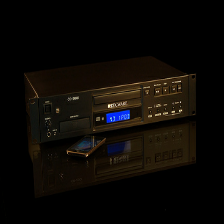

In [7]:
img

In [5]:
# get keras resnet model
model = tf.keras.applications.VGG16(weights='imagenet', include_top=False)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

In [4]:
resnet = tf.keras.estimator.model_to_estimator(keras_model=model)

INFO:tensorflow:Using the Keras model from memory.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmptc2eowx6', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f29aaf269b0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


ValueError: ('Expected `model` argument to be a `Model` instance, got ', <keras.engine.training.Model object at 0x7f2c8a3a5908>)

In [10]:
train_spec = tf.estimator.TrainSpec(input_fn = lambda: imgs_input_fn(ImagenetData("/data2/imagenet/tfrecords", "val"), perform_shuffle=False, repeat_count=1))
eval_spec = tf.estimator.EvalSpec(input_fn = lambda: imgs_input_fn(ImagenetData("/data2/imagenet/tfrecords", "val"), perform_shuffle=False, repeat_count=1))

In [14]:
resnet.evaluate(input_fn=lambda: imgs_input_fn(ImagenetData("/data2/imagenet/tfrecords", "val"), perform_shuffle=False, repeat_count=1, batch_size=64), steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-02-24-00:11:34
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp_u2ttda8/keras_model.ckpt
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


KeyboardInterrupt: 